## Issue 320: append Triangle Boundary effect in ERT sensistivity 

https://github.com/gimli-org/gimli/issues/320

### Import pyGIMLi and the needed modules

In [1]:
import pygimli as pg
from pygimli.physics import ert  # the module
import pygimli.meshtools as mt

Load the data and create a world containing the electrodes as nodes.

In [2]:
data = ert.load("simple.dat")
world2 = mt.createWorld(start=[-30, -20], end=[30, 0], marker=2, worldMarker=True)
for pos in data.sensorPositions():
    world2.createNode(pos)

### Standard modelling with the small mesh

Create a mesh and map the resistivity to it (or take a constant vector instead).
Set up a forward operator and compute forward response and Jacobian.

05/08/21 - 18:41:05 - pyGIMLi - INFO - Found 1 regions.
05/08/21 - 18:41:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 18:41:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


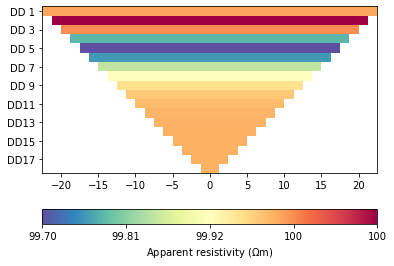

In [3]:
mesh = mt.createMesh(world2, area=.2, quality=33, marker=2)
rhomap = [[2, 100]]
rhomodel = pg.solver.parseArgToArray(rhomap, mesh.cellCount(), mesh)
fop = ert.ERTModelling()
fop.setData(data)
fop.setMesh(mesh)
dr = fop.response(rhomodel)
ert.showData(data, vals=dr)
fop.createJacobian(rhomodel)
J = pg.utils.gmat2numpy(fop.jacobian())

(-10.0, 0.0)

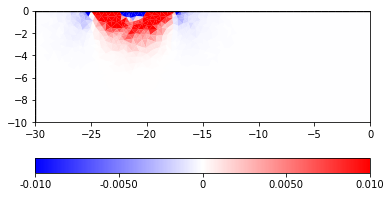

In [10]:
ax, cb = pg.show(fop.paraDomain, J[0,:], cMin=-0.01, cMax=0.01, cMap="bwr");
ax.set_xlim([-30, 0])
ax.set_ylim([-10, 0])

Generate a bigger mesh by appending a boundary that is triangulated.

Mesh: Nodes: 5321 Cells: 10358 Boundaries: 15678
Mesh: Nodes: 5967 Cells: 11808 Boundaries: 17774


(<matplotlib.axes._subplots.AxesSubplot at 0x18b8d62dee0>,
 <matplotlib.colorbar.Colorbar at 0x18b8d68d400>)

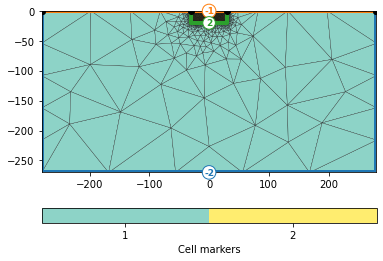

In [5]:
print(mesh)
bigMesh = pg.meshtools.appendTriangleBoundary(mesh, marker=1, xbound=250, ybound=250)
print(bigMesh)
pg.show(bigMesh, markers=True, showMesh=True)

### Variant 1: use the boundary part as backgroung (not part of model vector)

05/08/21 - 18:41:19 - pyGIMLi - INFO - Found 2 regions.
05/08/21 - 18:41:19 - pyGIMLi - INFO - Region with smallest marker (1) set to background
05/08/21 - 18:41:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 18:41:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


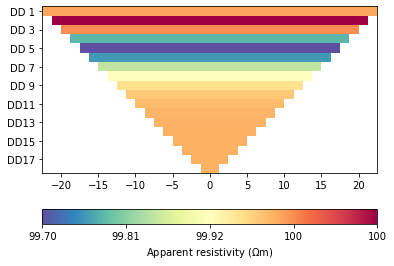

In [6]:
fop1 = ert.ERTModelling()
fop1.setData(data)
fop1.setMesh(bigMesh)
fop1.region(1).setBackground(True)
dr = fop1.response(rhomodel)
ert.showERTData(data, vals=dr)
fop1.createJacobian(rhomodel)
J1 = pg.utils.gmat2numpy(fop.jacobian())

(-10.0, 0.0)

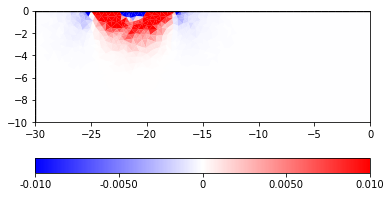

In [7]:
ax, cb = pg.show(fop1.paraDomain, J1[0,:], cMin=-0.01, cMax=0.01, cMap="bwr");
ax.set_xlim([-30, 0])
ax.set_ylim([-10, 0])

### Variant 2: fill the boundary mesh with a resistivity

05/08/21 - 18:41:32 - pyGIMLi - INFO - Found 2 regions.
05/08/21 - 18:41:32 - pyGIMLi - INFO - Region with smallest marker (1) set to background
05/08/21 - 18:41:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 18:41:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


(-10.0, 0.0)

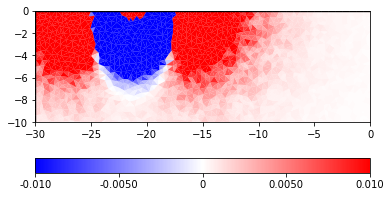

In [8]:
fop2 = ert.ERTModelling()
fop2.setData(data)
fop2.setMesh(bigMesh)
rhomap2 = [[1, 100],[2, 100]]
rhomodel2 = pg.solver.parseArgToArray(rhomap2, bigMesh.cellCount(), bigMesh)
fop2.region(1).setBackground(False)
dr = fop2.response(rhomodel2)
# ert.showERTData(data, vals=dr)
fop2.createJacobian(rhomodel2)
J2 = pg.utils.gmat2numpy(fop2.jacobian())
ax, cb = pg.show(fop2.paraDomain, J2[0,:], cMin=-0.01, cMax=0.01, cMap="bwr");
ax.set_xlim([-30, 0])
ax.set_ylim([-10, 0])

### Variant 3: use the same marker for inner and outer mesh

05/08/21 - 18:41:46 - pyGIMLi - INFO - Found 1 regions.
05/08/21 - 18:41:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 18:41:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


(-10.0, 0.0)

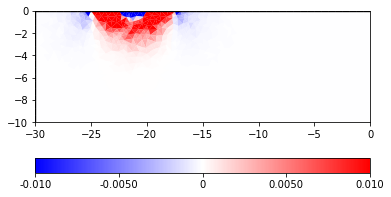

In [9]:
bigMesh3 = pg.meshtools.appendTriangleBoundary(mesh, marker=2, xbound=250, ybound=250)
fop3 = ert.ERTModelling()
fop3.setData(data)
fop3.setMesh(bigMesh3)
rhomodel3 = pg.Vector(bigMesh3.cellCount(), 100)
dr = fop3.response(rhomodel3)
# ert.showERTData(data, vals=dr)
fop3.createJacobian(rhomodel3)
J3 = pg.utils.gmat2numpy(fop3.jacobian())
ax, cb = pg.show(fop3.paraDomain, J3[0,:], cMin=-0.01, cMax=0.01, cMap="bwr")
ax.set_xlim([-30, 0])
ax.set_ylim([-10, 0])